In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

In [3]:
# Define the parameters for the Gaussian distributions (True model)
m0 = np.array([-1, 1, -1, 1])
s0_true_model = np.array([[2, -0.5, 0.3, 0], [-0.5, 1, -0.5, 0], [0.3, -0.5, 1, 0], [0, 0, 0, 2]])

m1 = np.array([1, 1, 1, 1])
s1_true_model = np.array([[1, 0.3, -0.2, 0], [0.3, 2, 0.3, 0], [-0.2, 0.3, 1, 0], [0, 0, 0, 3]])

In [4]:
# Define the class priors
p_y0 = 0.7
p_y1 = 0.3

# Generate samples
n_samples = 10000
sampleclass0 = np.random.multivariate_normal(m0, s0_true_model, int(n_samples * p_y0))
sampleclass1 = np.random.multivariate_normal(m1, s1_true_model, int(n_samples * p_y1))

# Combine the samples
X = np.vstack((sampleclass0, sampleclass1))
y = np.array([0] * len(sampleclass0) + [1] * len(sampleclass1))

Part A: True Model

In [5]:
# Define the Gaussian PDFs with the true covariance matrices
pdf_class0_true = multivariate_normal(mean=m0, cov=s0_true_model)
pdf_class1_true = multivariate_normal(mean=m1, cov=s1_true_model)

# Likelihood ratio test function for the true model
def likelihood_ratio_test(x, gamma, pdf0, pdf1):
    likelihood_ratio = pdf1.pdf(x) / pdf0.pdf(x)
    return likelihood_ratio > gamma

In [6]:
# Function to compute TPR and FPR for a given gamma
def computetprfpr(gamma, pdf0, pdf1):
    y_pred = np.array([likelihood_ratio_test(sample, gamma, pdf0, pdf1) for sample in X])
    TP = np.sum((y_pred == 1) & (y == 1))
    FP = np.sum((y_pred == 1) & (y == 0))
    FN = np.sum((y_pred == 0) & (y == 1))
    TN = np.sum((y_pred == 0) & (y == 0))
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    return TPR, FPR

In [7]:
# Compute ROC curve for the true classifier
gammas = np.logspace(-10, 10, 100)
tpr_values_truemodel = []
fpr_values_truemodel = []

for gamma in gammas:
    tpr, fpr = computetprfpr(gamma, pdf_class0_true, pdf_class1_true)
    tpr_values_truemodel.append(tpr)
    fpr_values_truemodel.append(fpr)

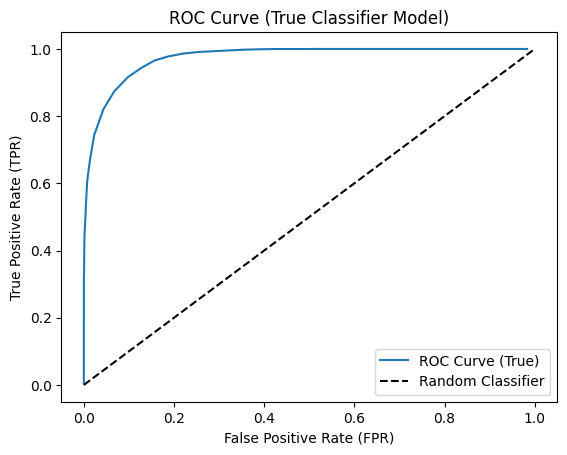

In [8]:
# Plot ROC curve for the true classifier
plt.figure()
plt.plot(fpr_values_truemodel, tpr_values_truemodel, label='ROC Curve (True)')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve (True Classifier Model)')
plt.legend()
plt.show()

In [9]:
# Determine the optimal gamma for the true classifier
min_error_truemodel = float('inf')
optimal_gamma_truemodel = None
for gamma in gammas:
    tpr, fpr = computetprfpr(gamma, pdf_class0_true, pdf_class1_true)
    error = (fpr * p_y0) + ((1 - tpr) * p_y1)
    if error < min_error_truemodel:
        min_error_truemodel = error
        optimal_gamma_truemodel = gamma

print("Optimal Gamma Value(True Classifier): ", optimal_gamma_truemodel)
print("Minimum Probability of Error (True Classifier): ", min_error_truemodel)

Optimal Gamma Value(True Classifier):  3.1992671377973845
Minimum Probability of Error (True Classifier):  0.08420000000000001


In [10]:
# Visualize TPR and FPR at the optimal gamma for the true classifier
tpr_optimal_truemodel, fpr_optimal_truemodel = computetprfpr(optimal_gamma_truemodel, pdf_class0_true, pdf_class1_true)
print("TPR at Optimal Gamma Value (True Classifier): ", tpr_optimal_truemodel)
print("FPR at Optimal Gamma Value (True Classifier): ", fpr_optimal_truemodel)

TPR at Optimal Gamma Value (True Classifier):  0.821
FPR at Optimal Gamma Value (True Classifier):  0.04357142857142857


Part B: Naive Classifier

In [11]:
# Define the incorrect covariance matrices (diagonal)
s0_naive = np.diag(np.diag(s0_true_model))
s1_naive = np.diag(np.diag(s1_true_model))

# Define the Gaussian PDFs with the incorrect covariance matrices
pdf_class0_naive = multivariate_normal(mean=m0, cov=s0_naive)
pdf_class1_naive = multivariate_normal(mean=m1, cov=s1_naive)

# Part B: Compute ROC curve for the naive classifier
tpr_values_naivemodel = []
fpr_values_naivemodel = []

In [12]:
#Compute ROC curve for the naive classifier
tpr_values_naivemodel = []
fpr_values_naivemodel = []

for gamma in gammas:
    tpr, fpr = computetprfpr(gamma, pdf_class0_naive, pdf_class1_naive)
    tpr_values_naivemodel.append(tpr)
    fpr_values_naivemodel.append(fpr)

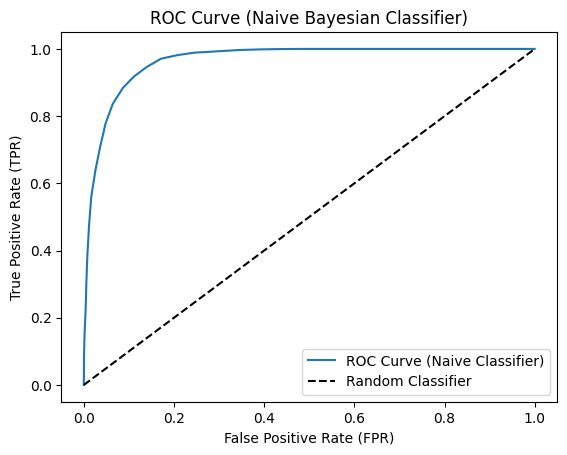

In [13]:
# Plot ROC curve for the naive classifier
plt.figure()
plt.plot(fpr_values_naivemodel, tpr_values_naivemodel, label='ROC Curve (Naive Classifier)')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve (Naive Bayesian Classifier)')
plt.legend()
plt.show()

In [14]:
# Determine the optimal gamma for the naive classifier
min_error_naivemodel = float('inf')
optimal_gamma_naivemodel = None
for gamma in gammas:
    tpr, fpr = computetprfpr(gamma, pdf_class0_naive, pdf_class1_naive)
    error = (fpr * p_y0) + ((1 - tpr) * p_y1)
    if error < min_error_naivemodel:
        min_error_naivemodel = error
        optimal_gamma_naivemodel = gamma

print("Optimal Gamma Value(Naive Classifier): ", optimal_gamma_naivemodel)
print("Minimum Probability of Error (Naive Classifier): ", min_error_naivemodel)

Optimal Gamma Value(Naive Classifier):  3.1992671377973845
Minimum Probability of Error (Naive Classifier):  0.09399999999999997


In [15]:
# Visualize TPR and FPR at the optimal gamma for the naive classifier
tpr_optimal_naivemodel, fpr_optimal_naivemodel = computetprfpr(optimal_gamma_naivemodel, pdf_class0_naive, pdf_class1_naive)
print("TPR at Optimal Gamma (Naive): ", tpr_optimal_naivemodel)
print("FPR at Optimal Gamma (Naive): ", fpr_optimal_naivemodel)

TPR at Optimal Gamma (Naive):  0.8363333333333334
FPR at Optimal Gamma (Naive):  0.06414285714285714


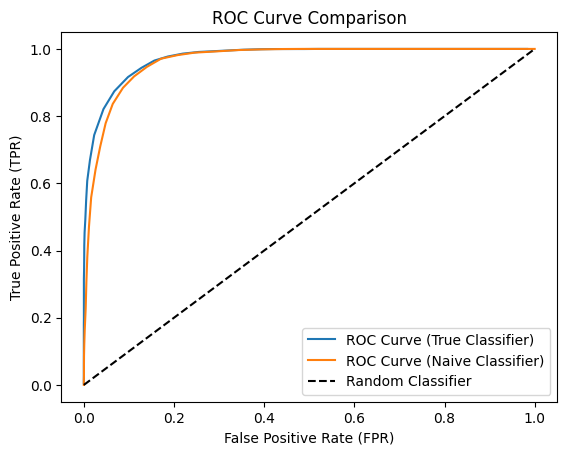

In [16]:
# Plot ROC curves for both the true and naive classifiers for comparison
plt.figure()
plt.plot(fpr_values_truemodel, tpr_values_truemodel, label='ROC Curve (True Classifier)')
plt.plot(fpr_values_naivemodel, tpr_values_naivemodel, label='ROC Curve (Naive Classifier)')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()